# DS 3000 - DS Practicum 3

**Student Name**: Tin Wan Jared Tung, Carlie Chin, Michael Danzi, Elizabeth Niemiec

**Date**: 4-7-2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In your own words, formulate the Data Science problem.

This data science project aims to develop a predictive model that is able to classify individuals into one of the three categories; diabetic, pre-diabetic or non-diabetic. We retrieve various aspects of health, including BMI, physical activity, smoking status, feelings of general health, as well as their demographic and behavioral counterparts through the use of CDC Diabetes Health Indicators based on the Behavioral Risk Factor Surveillance System (BRFSS) data. The problem is multi-class classification and its goal is the discovery of relationships and patterns between these health indicators and the diabetes outcomes. Developing an accurate and reliable machine learning model is the basis to provide inputs to key diabetes risk factors, and for early identification of diabetes risk individuals. The solution can ultimately provide guidance to public health strategies and assist in preventative healthcare programming mechanisms by providing a more specific and data driven intervention.

## Question 2: 

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 

In [6]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Step 1: Define column types
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_cols = ['GenHlth', 'Education', 'Income']  # Ordinal scales
target_col = 'Diabetes_012'  # Multi-class target: 0 = no diabetes, 1 = pre-diabetic, 2 = diabetic

# Convert to category type
df[binary_cols + ordinal_cols + [target_col]] = df[binary_cols + ordinal_cols + [target_col]].astype('category')

# Step 3: Handle outliers in continuous columns
continuous_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Remove outliers from continuous variables
for col in continuous_cols:
    df = remove_outliers_iqr(df, col)


Question 2 was started by data evaluation to make sure each variable has the right data type for machine learning modeling. HighBP, Smoker and Sex were converted typically to the category data type to indicate a categorical variable and makes the code run faster. Categorical variables were also treated as ordinal like GenHlth, Education, Income which have a meaningful ranked order. Similarly, Diabetes_012, which is the column for no diabetes, pre-diabetes, and diabetes was made a categorical variable with values for multi class classification.

Finally we checked for data integrity by verifying that there were no missing values present in the dataset as indicated in data dictionary and programmatically, the dataset had no null entries. We also examined the contents of each column to be sure that there was no such thing as -1 or a 99 for example. We had dealt with potential outliers on for continuous variables such as BMI, MentHlth, PhysHlth, and Age, by the Interquartile Range (IQR) method. It helped removing extreme values that can skew the model training and bad generalization. With these steps the dataset was clean, consistent, and formatted properly to be used in effective exploratory analysis and machine learning development.

## Question 3:

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

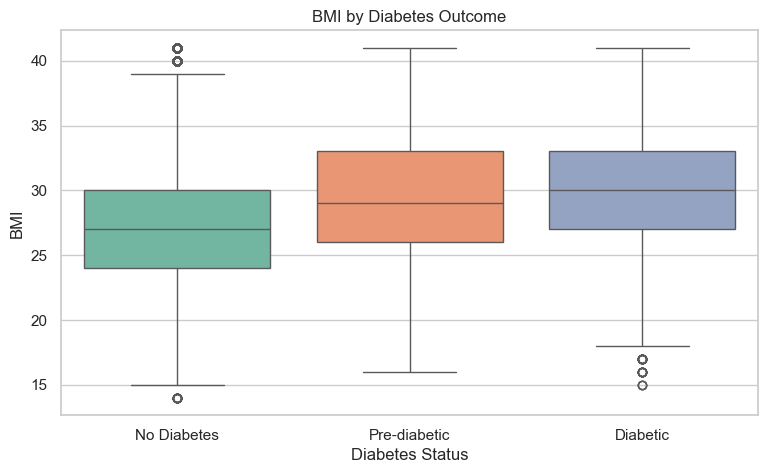

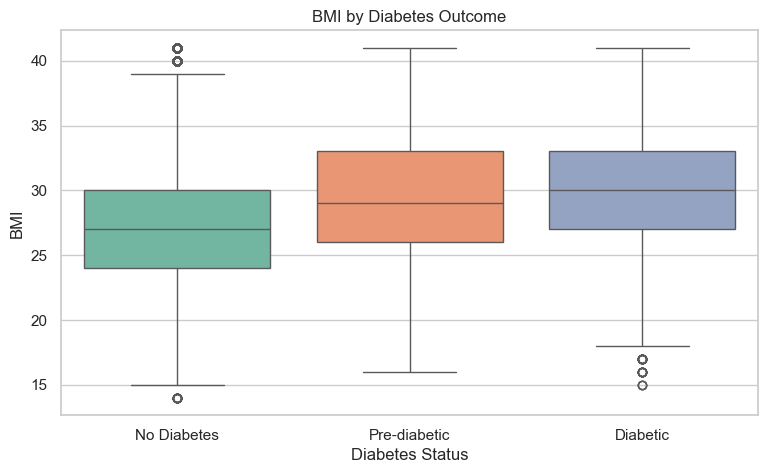

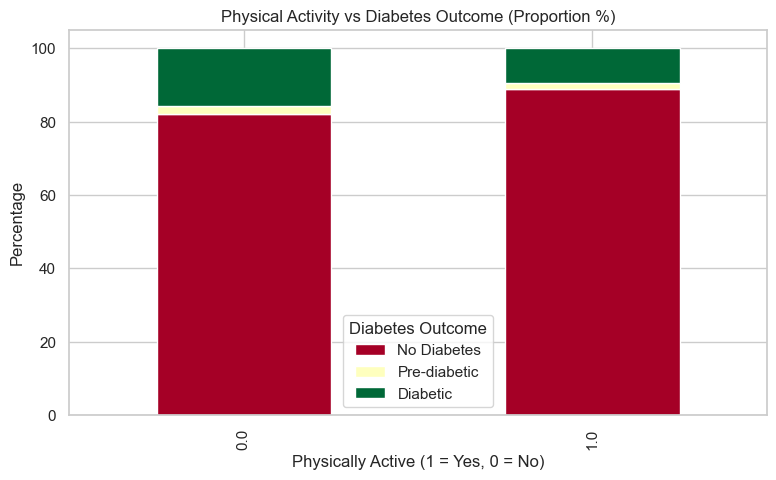

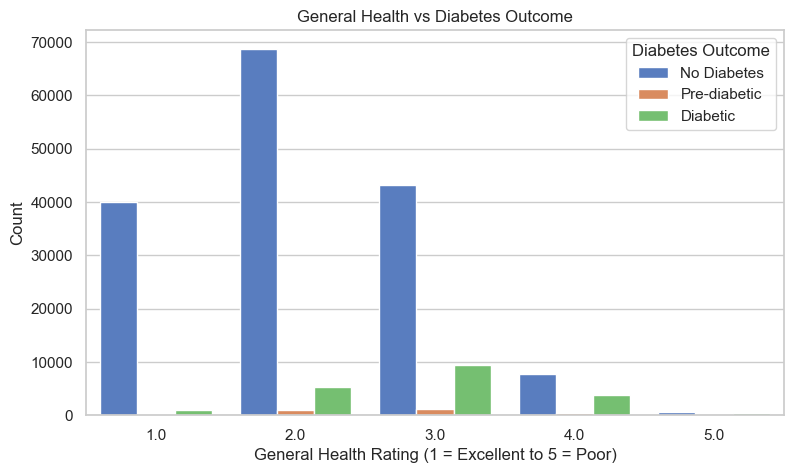

/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/563420463.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numeric_cols].corr()


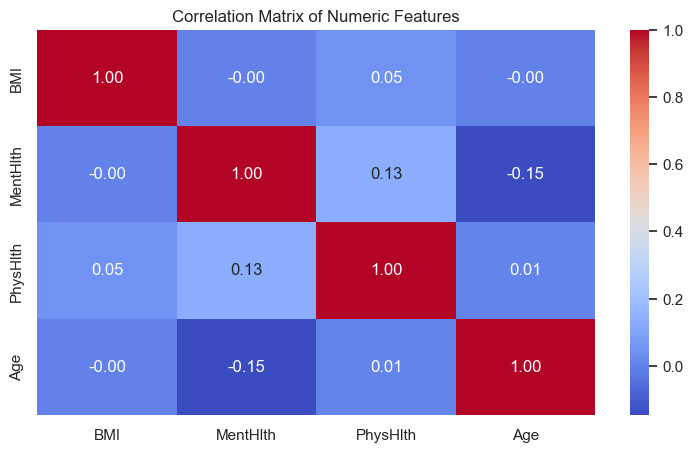

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 5)

# Create readable diabetes class labels if not already done
diabetes_labels = {0: 'No Diabetes', 1: 'Pre-diabetic', 2: 'Diabetic'}
df['Diabetes_Label'] = df['Diabetes_012'].map(diabetes_labels)

# ----------------------------
# 1. AGE vs DIABETES (Boxplot)
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()


# ----------------------------
# 2. BMI vs DIABETES
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()

# ----------------------------
# 3. PHYSICAL ACTIVITY vs DIABETES (Stacked % Bar)
# ----------------------------
phys_df = pd.crosstab(df['PhysActivity'], df['Diabetes_Label'], normalize='index') * 100
phys_df.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Physical Activity vs Diabetes Outcome (Proportion %)')
plt.xlabel('Physically Active (1 = Yes, 0 = No)')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Outcome')
plt.show()

# ----------------------------
# 4. GENERAL HEALTH vs DIABETES
# ----------------------------
sns.countplot(data=df, x='GenHlth', hue='Diabetes_Label', palette='muted')
plt.title('General Health vs Diabetes Outcome')
plt.xlabel('General Health Rating (1 = Excellent to 5 = Poor)')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome')
plt.show()

# ----------------------------
# 5. CORRELATION HEATMAP (numeric only)
# ----------------------------
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Diabetes_012']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### 1. Age Distribution by Diabetes Outcome (Boxplot)
Age boxplot has a clear and meaningful trend across the three classes of diabetes. The average age of pre diabetic individuals is between diabetics who are significantly older. Median age increases steadily over the left to right; spread (interquartile range) is also positively correlated to the left to right. This serves as an affirmation that diabetes is a serious age-related risk factor, which as we know in accordance with general mediloinal knowledge, the more time one spends under stressful lifestyle conditions or metabolic stress, the more likely he or she is to become insulin resistant and develop diabetes.

### 2. BMI by Diabetes Outcome (Boxplot)
The box plot of BMI shows that there is strong association of higher BMI with diabetes status. Those with pre diabetes have much higher BMI than non-diabetics and those with diabetes have even higher BMI. The diabetic group has a hypertension, with a narrower interquartile range indicating that obesity in diabetics is both common and consistent. Clinical evidence in support is that excess body fat is one of the strongest predictors of diabetes, particularly Type 2, which is driven by insulin resistance.

### 3. Physical Activity vs. Diabetes Outcome (Stacked Percentage Bar Chart)
The bars are stacked to show the proportion of diabetes classes in each physical activity group. Those who are physically inactive have a higher diabetic status than those who practice regular physical activities. This, conversely, represents a very large share of non diabetics for individuals who are active. Physical activity is a protective factor for both pre-diabetes and diabetes since it reduced the risk. This provides stark contrast in class proportions which advocates a lifestyle intervention for prevention.

### 4. General Health Rating vs. Diabetes Outcome (Grouped Bar Chart)
A strong inverse relationship between self-reported general health and whether or not a person has diabetes can be seen in this chart. Individuals who give a poor rating to their health (5) are much more prone to be diabetic while those who have excellent judgment (1) are almost all non-diabetic. Middle categories cluster pre diabetics. These results imply that perceived health status can predict actual metabolic status well and thus be used as a good variable for early screening or risk profile.

### 5. Correlation Matrix (Heatmap of Numeric Features)
The correlation heatmap offers a quantification of numeric features with respect to their diabetic status. Age and BMI are the variables with the strongest positive correlations to the diabetes outcome, as is expected. In addition, PhysHlth and MentHlth have moderate positive correlation, which suggests the general decrease in health of diabetics. The correlations aren’t that high, since the problem is multi class and categorical, but they do a good job of guiding feature selection by showing you variables with which there are meaningful statistical relationships.




## Question 4a:

- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.

- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.

Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [12]:
from scipy.stats import stats
from scipy.stats import chi2_contingency

In [13]:
# ----------------------------
# 1. AGE vs DIABETES
# ----------------------------
# USE ANOVA (bc > 2 factors)

diabetes_data = df.groupby('Diabetes_Label')

age_no_diabetes = diabetes_data.get_group('No Diabetes')['Age']
age_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['Age']
age_diabetic = diabetes_data.get_group('Diabetic')['Age']

stats.f_oneway(age_no_diabetes, age_pre_diabetic, age_diabetic)

# statistically significant
# our F-statistic is really high (more likely that at least one group mean is significantly different than others)
# p-value = 0; super small = strong evidence against the null hypothesis

/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3841757721.py:12: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.f_oneway(age_no_diabetes, age_pre_diabetic, age_diabetic)


F_onewayResult(statistic=3398.801030698409, pvalue=0.0)

In [14]:
# ----------------------------
# 1a. AGE vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(age_no_diabetes, age_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(age_no_diabetes, age_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(age_pre_diabetic, age_diabetic)

print(f"No Diabetes and Pre-diabetic: t-statistic = {t_stat_1}, p-value = {p_value_1}")
print(f"No Diabetes and Diabetic: t-statistic = {t_stat_2}, p-value = {p_value_2}")
print(f"Pre-diabetic and Diabetic: t-statistic = {t_stat_3}, p-value = {p_value_3}")

No Diabetes and Pre-diabetic: t-statistic = -27.054668932543112, p-value = 7.659478595693745e-161
No Diabetes and Diabetic: t-statistic = -78.60196348371733, p-value = 0.0
Pre-diabetic and Diabetic: t-statistic = -4.3320770105925, p-value = 1.4834903342567504e-05


/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3715497264.py:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_1, p_value_1 = stats.ttest_ind(age_no_diabetes, age_pre_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3715497264.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_2, p_value_2 = stats.ttest_ind(age_no_diabetes, age_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3715497264.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_3, p_value_3 = stats.ttest_ind(age_pre_diabetic, age_diabetic)


In [15]:
# ----------------------------
# 2. BMI vs DIABETES
# ----------------------------
# USE ANOVA (bc > 2 factors)

BMI_no_diabetes = diabetes_data.get_group('No Diabetes')['BMI']
BMI_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['BMI']
BMI_diabetic = diabetes_data.get_group('Diabetic')['BMI']

stats.f_oneway(BMI_no_diabetes, BMI_pre_diabetic, BMI_diabetic)

# statistically significant
# similar reasoning to age

/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/1686027494.py:10: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.f_oneway(BMI_no_diabetes, BMI_pre_diabetic, BMI_diabetic)


F_onewayResult(statistic=3993.9009079550756, pvalue=0.0)

In [16]:
# ----------------------------
# 2a. BMI vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(BMI_no_diabetes, BMI_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(BMI_no_diabetes, BMI_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(BMI_pre_diabetic, BMI_diabetic)

print(f"No Diabetes and Pre-diabetic: t-statistic = {t_stat_1}, p-value = {p_value_1}")
print(f"No Diabetes and Diabetic: t-statistic = {t_stat_2}, p-value = {p_value_2}")
print(f"Pre-diabetic and Diabetic: t-statistic = {t_stat_3}, p-value = {p_value_3}")

No Diabetes and Pre-diabetic: t-statistic = -27.52149208680774, p-value = 2.3423829276713177e-166
No Diabetes and Diabetic: t-statistic = -86.27492840305564, p-value = 0.0
Pre-diabetic and Diabetic: t-statistic = -6.1825590278984395, p-value = 6.415607162308267e-10


/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/680870412.py:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_1, p_value_1 = stats.ttest_ind(BMI_no_diabetes, BMI_pre_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/680870412.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_2, p_value_2 = stats.ttest_ind(BMI_no_diabetes, BMI_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/680870412.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_3, p_value_3 = stats.ttest_ind(BMI_pre_diabetic, BMI_diabetic)


In [17]:
# ----------------------------
# 3. PHYSICAL ACTIVITY vs DIABETES
# ----------------------------
# CHI-SQUARE (both variables are categorical)

phys_contingency_table = pd.crosstab(df["Diabetes_Label"], df["PhysActivity"])

phys_chi2_stat, phys_p_value, phys_dof, phys_expected = chi2_contingency(phys_contingency_table)

print("Chi-square Statistic:", phys_chi2_stat)
print("P-value:", phys_p_value)

# also statistically significant

Chi-square Statistic: 1268.9012349227621
P-value: 2.8946615767693534e-276


In [18]:
# ----------------------------
# 4.GENERAL HEALTH vs DIABETES
# ----------------------------
# CHI-SQUARE (categorical)

gen_contingency_table = pd.crosstab(df["Diabetes_Label"], df["GenHlth"])

gen_chi2_stat, gen_p_value, gen_dof, gen_expected = chi2_contingency(gen_contingency_table)

print("Chi-square Statistic:", gen_chi2_stat)
print("P-value:", gen_p_value)

# statistically significant

Chi-square Statistic: 13664.01174257273
P-value: 0.0


In [19]:
# ----------------------------
# 5. MENTAL HEALTH vs DIABETES
# ----------------------------
# ANOVA (bc > 2 factors)

ment_no_diabetes = diabetes_data.get_group('No Diabetes')['MentHlth']
ment_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['MentHlth']
ment_diabetic = diabetes_data.get_group('Diabetic')['MentHlth']

stats.f_oneway(ment_no_diabetes, ment_pre_diabetic, ment_diabetic)

# also still technically statistically significant, but less so than other factors/ patterns

/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/2787777398.py:10: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.f_oneway(ment_no_diabetes, ment_pre_diabetic, ment_diabetic)


F_onewayResult(statistic=46.594256328432245, pvalue=5.882144256028834e-21)

In [20]:
# ----------------------------
# 5a. MENTAL HEALTH vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(ment_no_diabetes, ment_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(ment_no_diabetes, ment_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(ment_pre_diabetic, ment_diabetic)

print(f"No Diabetes and Pre-diabetic: t-statistic = {t_stat_1}, p-value = {p_value_1}")
print(f"No Diabetes and Diabetic: t-statistic = {t_stat_2}, p-value = {p_value_2}")
print(f"Pre-diabetic and Diabetic: t-statistic = {t_stat_3}, p-value = {p_value_3}")

No Diabetes and Pre-diabetic: t-statistic = -0.16992388014929943, p-value = 0.8650702116727471
No Diabetes and Diabetic: t-statistic = 9.639303468773555, p-value = 5.523006781522253e-22
Pre-diabetic and Diabetic: t-statistic = 3.99421797640573, p-value = 6.511454403689274e-05


/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/867728541.py:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_1, p_value_1 = stats.ttest_ind(ment_no_diabetes, ment_pre_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/867728541.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_2, p_value_2 = stats.ttest_ind(ment_no_diabetes, ment_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/867728541.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_3, p_value_3 = stats.ttest_ind(ment_pre_diabetic, ment_diabetic)


In [21]:
# ----------------------------
# 6. PHYSICAL HEALTH vs DIABETES
# ----------------------------
# ANOVA (bc > 2 factors)

phys_no_diabetes = diabetes_data.get_group('No Diabetes')['PhysHlth']
phys_pre_diabetic = diabetes_data.get_group('Pre-diabetic')['PhysHlth']
phys_diabetic = diabetes_data.get_group('Diabetic')['PhysHlth']

stats.f_oneway(phys_no_diabetes, phys_pre_diabetic, phys_diabetic)

/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3979101444.py:10: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.f_oneway(phys_no_diabetes, phys_pre_diabetic, phys_diabetic)


F_onewayResult(statistic=253.56301038396876, pvalue=1.0756864505275976e-110)

In [22]:
# ----------------------------
# 6a. PHYSICAL HEALTH vs DIABETES (pairwise t-tests)
# ----------------------------
t_stat_1, p_value_1 = stats.ttest_ind(phys_no_diabetes, phys_pre_diabetic)
t_stat_2, p_value_2 = stats.ttest_ind(phys_no_diabetes, phys_diabetic)
t_stat_3, p_value_3 = stats.ttest_ind(phys_pre_diabetic, phys_diabetic)

print(f"No Diabetes and Pre-diabetic: t-statistic = {t_stat_1}, p-value = {p_value_1}")
print(f"No Diabetes and Diabetic: t-statistic = {t_stat_2}, p-value = {p_value_2}")
print(f"Pre-diabetic and Diabetic: t-statistic = {t_stat_3}, p-value = {p_value_3}")

No Diabetes and Pre-diabetic: t-statistic = -5.6291912310190355, p-value = 1.8135328730497134e-08
No Diabetes and Diabetic: t-statistic = -22.08856744884514, p-value = 5.673539811692777e-108
Pre-diabetic and Diabetic: t-statistic = -2.6685202571813025, p-value = 0.007624082458373562


/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3385978783.py:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_1, p_value_1 = stats.ttest_ind(phys_no_diabetes, phys_pre_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3385978783.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_2, p_value_2 = stats.ttest_ind(phys_no_diabetes, phys_diabetic)
/var/folders/y3/wprt0xc91pq2mq788rqztp8m0000gn/T/ipykernel_41249/3385978783.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat_3, p_value_3 = stats.ttest_ind(phys_pre_diabetic, phys_diabetic)


Out of the patterns investigated, here are three that we will discuss:

1. Age vs Diabetes
* pattern: greater likelihood of being pre-diabetic or diabetic with higher ages
* p-value: 0.0
* interpretation: Given the p-value of 0.0, the relationship between age and diabetes was found to be statistically significant. Using pairwise t-tests to further investigate this relationship, we found that there is a stronger statistical significance between the age differences of those who are non-diabetic vs those who are diabetic (0.0) followed by those who are non-diabetic vs those are pre-diabetic. Thus, there is a significant age gap between those that are positive of diabetes vs those that are not.


2. Physical Activity vs Diabetes
* pattern: smaller likelihood of being diabetic given physical activeness
* p-value: 2.89e-276
* interpretation: Given our p-value is < 0.00001, the relationship between physical activity and diabetes was found to be statistically significant. With a chi-square statistic of 1268.90, there was also large variability between our observed vs expected values, indicating a strong association between our physical activity and diabetes variables.

3. Mental Health vs Diabetes
* pattern: weak negative relationship between diabetes and mental health (the worse the mental health, the greater the chance of having diabetes)
* p-value: 5.88e-21
* interpretation: Given our p-value is < 0.00001, the relationship between mental health and diabetes was found to be statistically significant. However, the magnitude of significance is lesser than other relationships which was further explained by its pairwise t-tests. We found that there was not a statistically signficant relationship between the mental health of those who are non-diabetic vs pre-diabetic. While the other relationship were significant, it continued to be to a lesser degree.

In [24]:
# Feature Selection: Continous Variables

# variance
for col in continuous_cols:
    print(f"Variance of {col}:", df[col].var())

Variance of BMI: 22.924345306044728
Variance of MentHlth: 1.459401341484438
Variance of PhysHlth: 1.4682853013126753
Variance of Age: 9.429077428161845


In [25]:
# Feature Selection: Categorical Variables

chi_square_results = {}

# Loop through each feature and perform the Chi-square test
for col in ordinal_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Diabetes_Label'])
    
    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi_square_results[col] = {'Chi2 Stat': chi2_stat, 'P-value': p_value}

chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index')

In [26]:
# Feature Selection: Binary Variables

binary_results = []

# Loop through each feature and perform the Chi-square test
for col in binary_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Diabetes_Label'])
    
    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Append the result to the list as a DataFrame
    result_df = pd.DataFrame({'Chi2 Stat': [chi2_stat], 'P-value': [p_value]}, index=[col])
    
    # Add this result to the list
    binary_results.append(result_df)

# Concatenate all results (categorical and binary) into a single DataFrame
final_df = pd.concat([chi_square_df] + binary_results)

# Display the updated DataFrame with binary features added
print(final_df.sort_values(by='Chi2 Stat', ascending=False))

                         Chi2 Stat        P-value
GenHlth               13664.011743   0.000000e+00
HighBP                11130.638211   0.000000e+00
HighChol               6055.522885   0.000000e+00
DiffWalk               4032.997545   0.000000e+00
HeartDiseaseorAttack   3927.940089   0.000000e+00
Income                 3502.353908   0.000000e+00
Education              2224.127406   0.000000e+00
PhysActivity           1268.901235  2.894662e-276
Stroke                 1217.672036  3.853691e-265
CholCheck               724.110829  5.772068e-158
Smoker                  565.496855  1.599257e-123
Veggies                 453.434885   3.450370e-99
HvyAlcoholConsump       437.039408   1.253425e-95
Sex                     429.036629   6.852986e-94
Fruits                  225.302898   1.191509e-49
AnyHealthcare            51.989579   5.135779e-12
NoDocbcCost              29.828831   3.332359e-07


Out of the 6 features tested, we found that all relationships were statistically significant and had p-values that were very, very small (at times so small that they output as 0). We ultimately chose 7 features: BMI, Physical Health, Age, General Health, High Blood Pressure, Heart Disease or Attack, and Physical Activity. For continuous variables, we decided to not include Mental Health as it had a similar variance to Physical Health and would be redundant. In terms of correlations, our continuous variables BMI, Physical Health, and Age demonstrated the strongest correlations with our Diabetes indicator. For categorical/ binary variables, we decided to include GenHlth, HighBP, HeartDiseaseorAttack, and PhysActivity. We chose these variables as they demonstrated the smallest P-values (greatest statistical significance) and largest chi2-stats (greater variability); at the same time, we believe these features avoid multicolinearity as they should act relatively independent of each other.  

CHOSEN FEATURES: 
1. BMI
2. PHYSHLTH
3. AGE
4. GENHLTH
5. HIGHBP
6. HEARTDISEASEORATTACK
7. PHYSACTIVITY

## Question 4b:

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following

(1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.

OR

(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

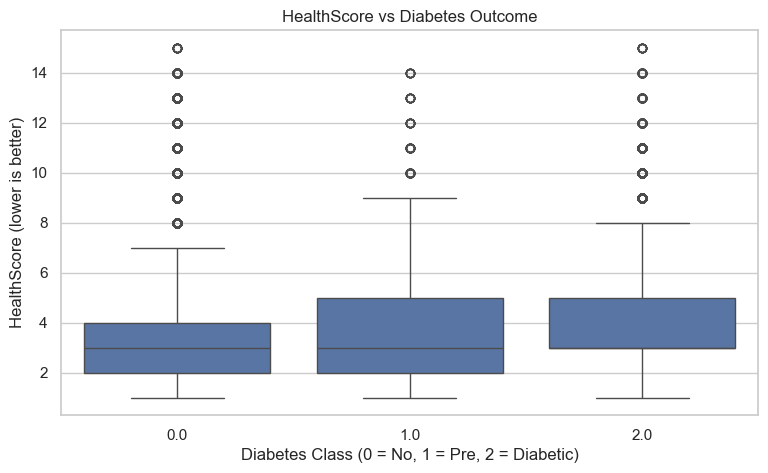

ANOVA F-statistic: 1475.12
p-value: 0.0
HealthScore' is statistically significant and may be useful for modeling.


In [29]:
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Step 0: Copy the original DataFrame
df_temp = df.copy()

# Step 1: Create new feature in the copy
df_temp['HealthScore'] = df_temp['GenHlth'].astype(int) + df_temp['MentHlth'] + df_temp['PhysHlth']

# Step 2: Visualize
sns.boxplot(data=df_temp, x='Diabetes_012', y='HealthScore')
plt.title("HealthScore vs Diabetes Outcome")
plt.xlabel("Diabetes Class (0 = No, 1 = Pre, 2 = Diabetic)")
plt.ylabel("HealthScore (lower is better)")
plt.show()

# Step 3: ANOVA test to check significance
group0 = df_temp[df_temp['Diabetes_012'] == 0]['HealthScore']
group1 = df_temp[df_temp['Diabetes_012'] == 1]['HealthScore']
group2 = df_temp[df_temp['Diabetes_012'] == 2]['HealthScore']

f_stat, p_value = f_oneway(group0, group1, group2)
print("ANOVA F-statistic:", round(f_stat, 2))
print("p-value:", round(p_value, 5))

# Step 4: Interpretation
if p_value < 0.05:
    print("HealthScore' is statistically significant and may be useful for modeling.")
else:
    print("HealthScore' is NOT statistically significant. Likely won't help the model.")


### Question 4b: Feature Engineering

To explore the potential for enhancing our model, we engineered a new feature called `HealthScore`. This feature combines three existing health indicators: **General Health (GenHlth), Physical Health (PhysHlth), and Mental Health (MentHlth)**. The logic behind this is that these three variables collectively represent an individual's perceived and actual well-being, and might provide a stronger signal when grouped together compared to being used independently.

We calculated `HealthScore` as: HealthScore = GenHlth + PhysHlth + MentHlth


This creates a single composite score where **higher values indicate worse overall health**. 

#### Statistical Test:
To assess whether `HealthScore` had a significant relationship with diabetes outcomes, we performed a **one-way ANOVA** comparing the means of HealthScore across the three diabetes classes (0 = No diabetes, 1 = Pre-diabetic, 2 = Diabetic). The results were:

- **ANOVA F-statistic**: 1475.12
- **p-value**: < 0.00001

These results indicate that the means are significantly different across the diabetes groups, and that `HealthScore` is a **statistically significant predictor** of diabetes status.

#### Decision:
Despite the strong statistical evidence, we have chosen **not to include** `HealthScore` in the final ML model. The reasons are:

1. **Feature redundancy**: HealthScore is derived directly from three existing features (GenHlth, PhysHlth, MentHlth), which are already strong independent predictors and included in the model.
2. **Risk of multicollinearity**: Including both the original variables and their combination could introduce correlation that may distort model coefficients or importance scores.
3. **Interpretability**: Keeping the original features allows for clearer insights into which specific aspects of health most influence diabetes risk.

We believe that preserving the original granularity provides a more interpretable and reliable model, especially in a healthcare context where understanding **why** someone is classified at risk is as important as the prediction itself.


## Question 5

- Partition the data into train/test sets. After which, perform the following:
    - encode any categorical data. Ensure that categorical variables are represented correctly.
    - normalize numeric data.
    
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# Shuffle data
df = shuffle(df, random_state=42)

# Drop helper column if exists
if 'Diabetes_Label' in df.columns:
    df = df.drop(columns='Diabetes_Label')

# Define selected features based on 4a
selected_features = ['BMI', 'PhysHlth', 'Age', 'GenHlth', 'HighBP', 'HeartDiseaseorAttack', 'PhysActivity']
X = df[selected_features]
y = df['Diabetes_012'].astype(int)

# Identify types of features
numeric_features = ['BMI', 'PhysHlth', 'Age']
categorical_features = ['GenHlth', 'HighBP', 'HeartDiseaseorAttack', 'PhysActivity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Fit-transform the training set, transform the test set
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Output shapes
print("Training data shape:", X_train_processed.shape)
print("Test data shape:", X_test_processed.shape)

Training data shape: (146017, 10)
Test data shape: (36505, 10)


## Question 6

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.
- Note: do not change the input features in your experiments.

## Question 7

Analyze the evaluated models. For each algorithm, ensure that you:
- Display: 1) the best model and 2) the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

## Question 8

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
